# Correlation

Given a pair of random variables ${\displaystyle (X,Y)}(X,Y)$, the formula for linear correlation coefficient $\rho$ is:

$$
{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}
$$

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

means = [0, 0]  
stds = [1, 1]
corr = 0.75
cov = stds[0]*stds[1]*corr

covs = [[stds[0]**2, cov], 
        [cov, stds[1]**2]] 

sample = np.random.multivariate_normal(means, covs, 10000).T

In [42]:
sample_df = pd.DataFrame(sample).T
sample_df.columns = ['x', 'y']

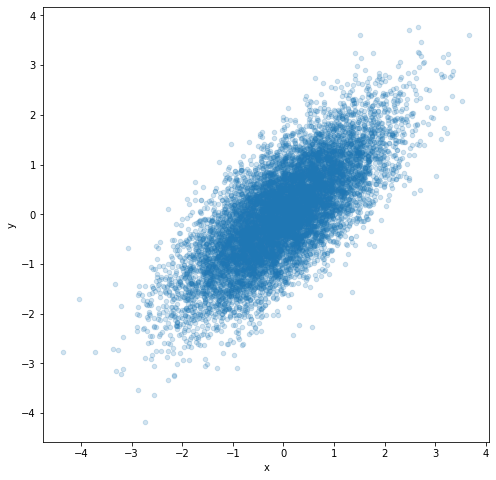

In [43]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

sample_df.plot(kind='scatter', x='x', y='y', alpha=0.2, ax=ax)
plt.show()

In [55]:
# Quadrants correlation
q1_corr = sample_df[(sample_df.x < 0) & (sample_df.y > 0)].corr().iloc[1, 0]
q2_corr = sample_df[(sample_df.x > 0) & (sample_df.y > 0)].corr().iloc[1, 0]
q3_corr = sample_df[(sample_df.x > 0) & (sample_df.y < 0)].corr().iloc[1, 0]
q4_corr = sample_df[(sample_df.x < 0) & (sample_df.y < 0)].corr().iloc[1, 0]

print('Quadrant one correlation: ' + str(round(q1_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q2_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q3_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q4_corr, 3)))

Quadrant one correlation: 0.185,
Quadrant one correlation: 0.522,
Quadrant one correlation: 0.151,
Quadrant one correlation: 0.504


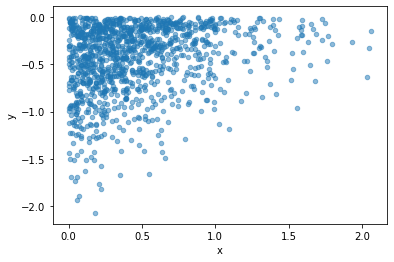

In [33]:
# Quadrants correlation
sample_df[(sample_df.x > 0) & (sample_df.y < 0)].plot(kind='scatter', x='x', y='y', alpha=0.5)
plt.show()

## Mutual Information


The Mutual Information is a measure of the similarity between two labels of the same data. Where $|U_i|$ is the number of the samples in cluster and 
 is the number of the samples in cluster 
, the Mutual Information between clusterings  and  is given as:

$$
MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}
$$
 
 
 
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

In [56]:
from sklearn.metrics import mutual_info_score

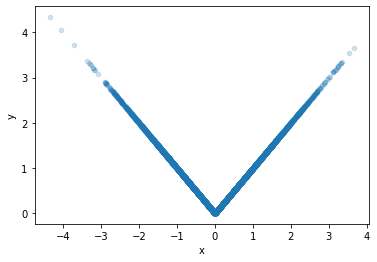

In [63]:
new_s = sample_df.x.apply(lambda x: -x if x < 0 else x)
new_sample_df = pd.concat([sample_df.loc[:, 'x'], new_s], axis=1)
new_sample_df.columns = ['x', 'y']
new_sample_df.plot(kind='scatter', x='x', y='y', alpha=0.2)
plt.show()

In [65]:
mutual_info_score(new_sample_df)

TypeError: mutual_info_score() missing 1 required positional argument: 'labels_pred'